# Kevin Martin & Ravjot Sachdev CIS663 - Wednesday @ 9:00pm EST

Final Project

Dataset used: https://www.kaggle.com/nautiyalamit/bar-crawl-detecting-heavy-drinking-data-set



**Outline:**
1. [Business Objectives](#Businessobjectives)
2. [Data Understanding](#Dataunderstanding)
3. [Data Preparation](#Datapreparation)
4. [Model Training/Testing](#Modeltrain)
5. [Analysis](#Analysis)
6. [Conclusion](#Conclusion)

# 1. Business Objectives <a class="anchor" id="Businessunderstanding"></a>


## 1.1 Preliminary Assessment<a class="anchor" id="Assessthecurrentsituation"></a>

 ## 1.2 Desired Outputs <a class="anchor" id="Desiredoutputs"></a>


**Business success criteria**



**Data mining success criteria**


 ## 1.3 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

# 2. Data Understanding <a class="anchor" id="Dataunderstanding"></a>

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a> 

In [1]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from numpy import nan
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#import keras
#from keras import models
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

In [2]:
#Data source: 
#Source Query location: 
data = './Project_Data/all_accelerometer_data_pids_13.csv'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
df =  pd.read_csv(data, sep=',')
df = df.rename(columns={'time': 'timestamp'})
#df['tiemstamp'] = pd.to_datetime(df.iloc[:,0],unit='ns')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['timestamp2'] = df['timestamp'].astype('datetime64[s]')
#df = df['timestamp'].dt.floor('s')
df['MAX_500'] = df.x.rolling(window=500).mean()
df['MAY_500'] = df.y.rolling(window=500).mean()
df['MAZ_500'] = df.z.rolling(window=500).mean()
df['MAX_1000'] = df.x.rolling(window=1000).mean()
df['MAY_1000'] = df.y.rolling(window=1000).mean()
df['MAZ_1000'] = df.z.rolling(window=1000).mean()
df['MAX_5000'] = df.x.rolling(window=5000).mean()
df['MAY_5000'] = df.y.rolling(window=5000).mean()
df['MAZ_5000'] = df.z.rolling(window=5000).mean()
df.head(10)

,timestamp,pid,x,y,z,timestamp2,MAX_500,MAY_500,MAZ_500,MAX_1000,MAY_1000,MAZ_1000,MAX_5000,MAY_5000,MAZ_5000
0,1970-01-01 00:00:00.000,JB3156,0.0000,0.0000,0.0000,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-01 00:00:00.000,CC6740,0.0000,0.0000,0.0000,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-05-02 14:04:42.409,SA0297,0.0758,0.0273,-0.0102,2017-05-02 14:04:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-05-02 14:04:42.455,SA0297,-0.0359,0.0794,0.0037,2017-05-02 14:04:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-05-02 14:04:42.500,SA0297,-0.2427,-0.0861,-0.0163,2017-05-02 14:04:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-05-02 14:04:43.945,SA0297,-0.2888,0.0514,-0.0145,2017-05-02 14:04:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-05-02 14:04:43.953,SA0297,-0.0413,-0.0184,-0.0105,2017-05-02 14:04:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-05-02 14:04:43.957,SA0297,-0.0413,-0.0001,0.0017,2017-05-02 14:04:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-05-02 14:04:43.963,SA0297,-0.0286,-0.0028,-0.0094,2017-05-02 14:04:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-05-02 14:04:43.974,SA0297,-0.0543,-0.0410,-0.0109,2017-05-02 14:04:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def create_frame(usr):
    #vars()[usr]
    maintmp = df[df['pid']==usr]
    datatmp = './Project_Data/usr/' + usr + '.csv'
    dftmp = pd.read_csv(datatmp, sep=',')
    dftmp = dftmp.rename(columns={'timestamp': 'timestamp2'})
    dftmp['timestamp2'] = pd.to_datetime(dftmp['timestamp2'], unit='s')
    dftmp['timestamp2'] = dftmp['timestamp2'].astype('datetime64[s]')
    df_out = pd.merge(maintmp, dftmp, on = "timestamp2", how='inner')
    return df_out

usrs = ['SA0297', 'PC6771', 'BK7610', 'DC6359', 'MC7070', 'MJ8002','BU4707', 'JR8022', 'HV0618', 'SF3079', 'JB3156', 'CC6740']
SA = create_frame(usrs[0])
PC = create_frame(usrs[1])
BK = create_frame(usrs[2])
DC = create_frame(usrs[3])
MC = create_frame(usrs[4])
MJ = create_frame(usrs[5])
BU = create_frame(usrs[6])
JR = create_frame(usrs[7])
HV = create_frame(usrs[8])
SF = create_frame(usrs[9])
JB = create_frame(usrs[10])
CC = create_frame(usrs[11])

In [4]:
frames = [SA, PC, BK, DC, MC, MJ, BU, JR, HV, SF, JB, CC]
df_all = pd.concat(frames)

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>


In [5]:
#This will validate our initial observation of the amount of unique records as well as attributes/column
print('Data shape:')
print(df_all.shape)
print(df_all.info())

Data shape:
(5510, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5510 entries, 0 to 830
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    5510 non-null   datetime64[ns]
 1   pid          5510 non-null   object        
 2   x            5510 non-null   float64       
 3   y            5510 non-null   float64       
 4   z            5510 non-null   float64       
 5   timestamp2   5510 non-null   datetime64[ns]
 6   MAX_500      5510 non-null   float64       
 7   MAY_500      5510 non-null   float64       
 8   MAZ_500      5510 non-null   float64       
 9   MAX_1000     5510 non-null   float64       
 10  MAY_1000     5510 non-null   float64       
 11  MAZ_1000     5510 non-null   float64       
 12  MAX_5000     5510 non-null   float64       
 13  MAY_5000     5510 non-null   float64       
 14  MAZ_5000     5510 non-null   float64       
 15  TAC_Reading  5510 non-null   floa

In [6]:
print(df_all[df_all.pid=='SA0297']['TAC_Reading'])
#print(df_all.timestamp2.shape[0])
#df_all.to_csv('./test1.csv')

0      0.032672
1      0.032672
2      0.032672
3      0.032672
4      0.032672
         ...   
391   -0.021275
392   -0.021275
393   -0.021275
394   -0.021275
395   -0.021275
Name: TAC_Reading, Length: 396, dtype: float64


## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>


### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>
The data is extremly complete, without any missing values. As such, no further cleaning needs to be done here.

In [7]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("\nThe selections has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
print(missing_values_table(df_all))


The selections has 16 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>
To address outliers, we will look at the fields using a standard box-and-whisker plot, observing visually those data points which may need to be removed.

Error in format
Error in format


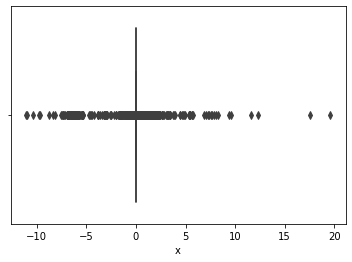

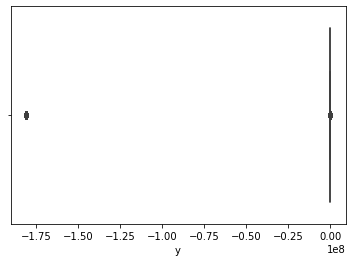

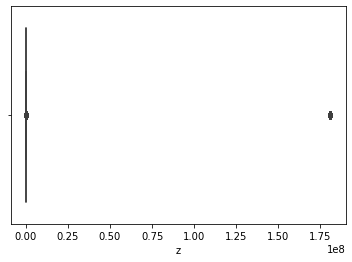

Error in format


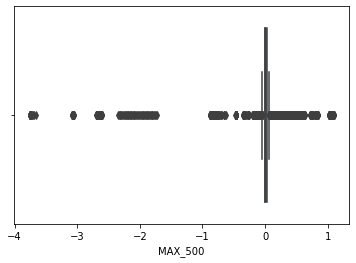

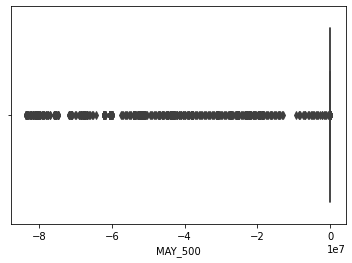

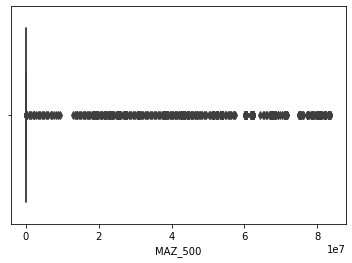

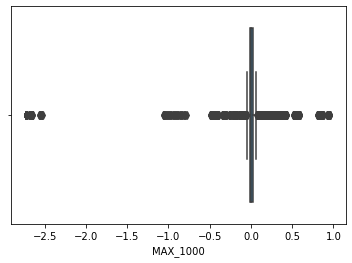

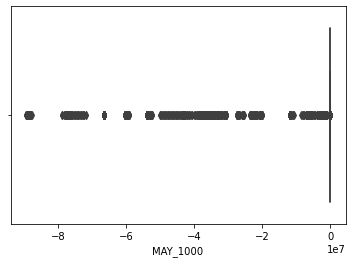

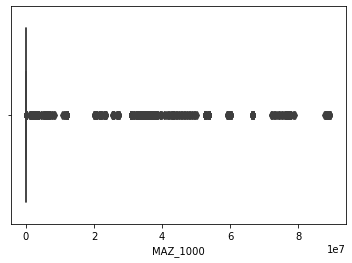

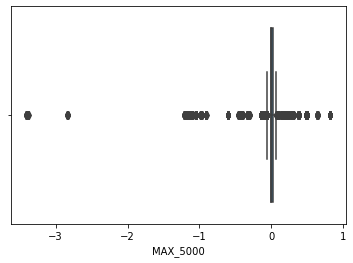

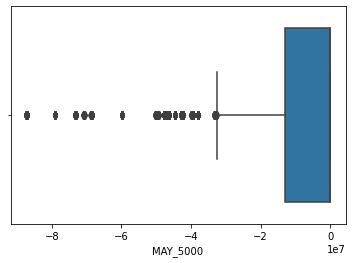

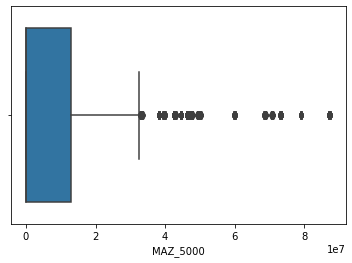

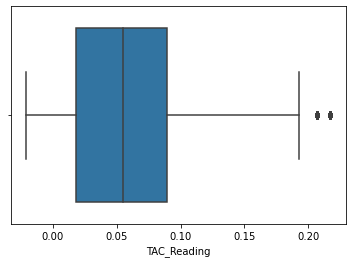

In [8]:
for col in df_all:
    try:
        sns.boxplot(x=df_all[col])
        plt.show()
    except:
        print('Error in format')

While see what could be considered outliers, note the relative scales for each graph. None of the data points are completely out of line (as in an order of magnitude off), and we feel confident in leaving the dataset untouched in this regard.

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>
For a quick visual look at our key attribute of quality, consider a simple histogram. It is immediately clear that the vast majority of wines are in the right in the middle. We see few wines that are on the edges as very high quality or very poor quality.

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

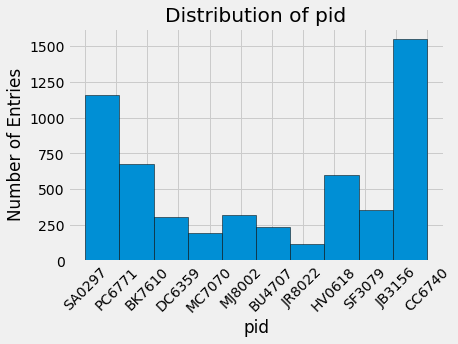

In [9]:
# Histogram
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries');
        plt.xticks(rotation=45)
        plt.title('Distribution of '+col);
        plt.show()

        
hist_chart(df_all, 'pid')

### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>
 

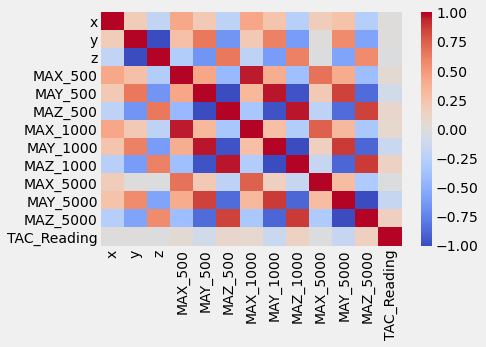

In [10]:
matr = df_all.corr()
sns.heatmap(matr,cmap='coolwarm')

plt.show()

In [11]:
corr_data = df_all[df_all.columns[1:]].corr()['TAC_Reading'][:]
sorted_corr_data = corr_data.sort_values(kind="quicksort")
print(sorted_corr_data)

MAY_5000      -0.161057
MAY_1000      -0.140065
MAY_500       -0.092721
MAX_5000      -0.013547
z             -0.008131
y              0.008131
x              0.009054
MAX_500        0.049736
MAX_1000       0.072595
MAZ_500        0.092721
MAZ_1000       0.140065
MAZ_5000       0.161057
TAC_Reading    1.000000
Name: TAC_Reading, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

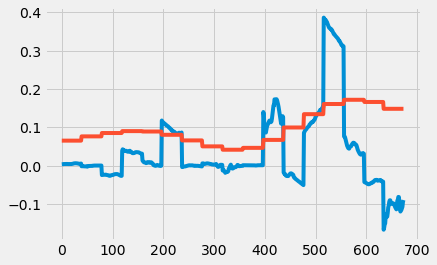

In [12]:
plt.plot(BK.MAX_1000, label='x')
plt.plot(df_all[df_all.pid=='BK7610']['TAC_Reading'], label='TAC')
plt.show

# 3. Data Preperation <a class="anchor" id="Datapreperation"></a>

In [13]:
print('Original shape of data')
print(df_all.shape)
print('Shape after removing duplicates')
df_all.drop_duplicates(keep='first')
print(df_all.shape)

Original shape of data
(5510, 16)
Shape after removing duplicates
(5510, 16)


Note that the shape remains the same after trying to remove duplicates. Thus no duplicate records exist.

## 3.2.3 Missing Values
No missing values to address.

In [14]:
print(df_all.shape)
df.dropna(inplace=True)
print(df_all.shape)

(5510, 16)
(5510, 16)


# 4 Regression

In [15]:
var_col = ['MAX_500', 'MAY_500', 'MAZ_500', 'MAX_1000', 'MAY_1000', 'MAZ_1000', 'MAX_5000', 'MAY_5000', 'MAZ_5000']
x = df_all[var_col]
y = df_all.TAC_Reading

avval = [np.mean(y) for i in y]
print('Baseline Errors')
print('Root Mean Squared Error: ',  np.sqrt(mean_squared_error(y, avval)))
print('Mean Absolute Error: ', mean_absolute_error(y, avval))

Baseline Errors
Root Mean Squared Error:  0.05099002800457635
Mean Absolute Error:  0.039912141789093976


In [16]:
def evaluate_regression(mdl,mdl_name,x,y,cols):
    x_train, x_test, y_train, y_test = train_test_split(x[cols], y, test_size=0.3, random_state=16)

    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    
    mdl.fit(x_train,y_train)
    predicted_data = mdl.predict(x_test)
    print(mdl_name, ' using ', cols)
    print('Root Mean Squared Error: ',  np.sqrt(mean_squared_error(y_test, predicted_data)))
    print('Mean Absolute Error: ', mean_absolute_error(y_test, predicted_data))
    #print('Accuracy: ', accuracy_score(y_test, predicted_data.round()))
    #return predicted_data, y_train, y_test
    
    
def plot_pred(pred,y_train, y_test, title):
    plt.figure(figsize=(17,5))
    plt.plot(y_train,label='Train')
    plt.plot(y_test,label='Actual')
    plt.plot(pred,label='Predicted')
    plt.ylabel("TAC")
    plt.title(title,fontsize=20)
    plt.legend()
    plt.show()    

    
lg = LinearRegression()
lg_name = 'Linear Regression'    
    
# Linear regression using all columns
evaluate_regression(lg,lg_name,x,y,var_col)
# plot_pred(lin, y_train, y_test, 'Linear')

# Linear regression using higher correlation columns
t = sorted_corr_data[var_col]
corr_cols = t[abs(t) > .1].index
evaluate_regression(lg,lg_name,x,y,corr_cols)

Linear Regression  using  ['MAX_500', 'MAY_500', 'MAZ_500', 'MAX_1000', 'MAY_1000', 'MAZ_1000', 'MAX_5000', 'MAY_5000', 'MAZ_5000']
Root Mean Squared Error:  0.04872868806827673
Mean Absolute Error:  0.03748393494801018
Linear Regression  using  Index(['MAY_1000', 'MAZ_1000', 'MAY_5000', 'MAZ_5000'], dtype='object')
Root Mean Squared Error:  0.04932229648229949
Mean Absolute Error:  0.038494711487117424


In [17]:
dtr = DecisionTreeRegressor()
dtr_name = 'Decision Tree Regressor'

# Linear regression using all columns
evaluate_regression(dtr,dtr_name,x,y,var_col)

# Linear regression using higher correlation columns
t = sorted_corr_data[var_col]
corr_cols = t[abs(t) > .1].index
evaluate_regression(dtr,dtr_name,x,y,corr_cols)

Decision Tree Regressor  using  ['MAX_500', 'MAY_500', 'MAZ_500', 'MAX_1000', 'MAY_1000', 'MAZ_1000', 'MAX_5000', 'MAY_5000', 'MAZ_5000']
Root Mean Squared Error:  0.010649723881183076
Mean Absolute Error:  0.0017567353635813774
Decision Tree Regressor  using  Index(['MAY_1000', 'MAZ_1000', 'MAY_5000', 'MAZ_5000'], dtype='object')
Root Mean Squared Error:  0.04457052656593603
Mean Absolute Error:  0.028853714559092206


In [18]:
rfr = RandomForestRegressor()
rfr_name = 'Random Forest Regressor'

# Linear regression using all columns
evaluate_regression(rfr,rfr_name,x,y,var_col)

# Linear regression using higher correlation columns
t = sorted_corr_data[var_col]
corr_cols = t[abs(t) > .1].index
evaluate_regression(rfr,rfr_name,x,y,corr_cols)

Random Forest Regressor  using  ['MAX_500', 'MAY_500', 'MAZ_500', 'MAX_1000', 'MAY_1000', 'MAZ_1000', 'MAX_5000', 'MAY_5000', 'MAZ_5000']
Root Mean Squared Error:  0.008596956019163339
Mean Absolute Error:  0.0025504422174652606
Random Forest Regressor  using  Index(['MAY_1000', 'MAZ_1000', 'MAY_5000', 'MAZ_5000'], dtype='object')
Root Mean Squared Error:  0.04448942829167536
Mean Absolute Error:  0.028941009808462745


# 5 Binary Classification

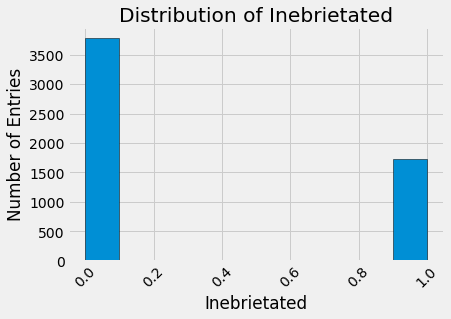

In [19]:
df_all2 = df_all.copy()
df_all2['Inebrietated'] = np.where(df_all2['TAC_Reading']>=.08,1,0)
hist_chart(df_all2, 'Inebrietated')

In [20]:
corr_data2 = df_all2[df_all2.columns[1:]].corr()['Inebrietated'][:]
sorted_corr_data2 = corr_data2.sort_values(kind="quicksort")
print(sorted_corr_data2)

z              -0.092750
MAY_5000       -0.089022
MAY_1000       -0.069809
MAX_5000       -0.041162
MAY_500        -0.031088
MAZ_500         0.031088
x               0.050060
MAX_500         0.068091
MAZ_1000        0.069809
MAX_1000        0.077150
MAZ_5000        0.089022
y               0.092750
TAC_Reading     0.811942
Inebrietated    1.000000
Name: Inebrietated, dtype: float64


In [21]:
num_vars_bin = var_col
print('Columns to check: ', num_vars_bin)
x_bin = df_all2[num_vars_bin]
y_bin = df_all2.Inebrietated

x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(x_bin, y_bin, test_size=0.3, random_state=16)

scaler_bin = StandardScaler().fit(x_train_bin)
x_train_bin = scaler_bin.transform(x_train_bin)
x_test_bin = scaler_bin.transform(x_test_bin)

def evaluate_bin(model, graph_flag):
    out_bin = model.fit(x_train_bin, y_train_bin)
    y_pred_bin = model.predict(x_test_bin)
    cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
    print ("Accuracy:", accuracy_score(y_test_bin, y_pred_bin)) 
    print("Precision:",metrics.precision_score(y_test_bin, y_pred_bin))
    print("Recall:",metrics.recall_score(y_test_bin, y_pred_bin))
    print("F1:", metrics.f1_score(y_test_bin,y_pred_bin))
    if graph_flag == 1:
        print ("Confusion Matrix: \n", cm_bin)
        sns.heatmap(cm_bin)
    return out_bin

Columns to check:  ['MAX_500', 'MAY_500', 'MAZ_500', 'MAX_1000', 'MAY_1000', 'MAZ_1000', 'MAX_5000', 'MAY_5000', 'MAZ_5000']


Accuracy: 0.3569267997580157
Precision: 0.3065743944636678
Recall: 0.878968253968254
F1: 0.45459209851205745
Confusion Matrix: 
 [[ 147 1002]
 [  61  443]]


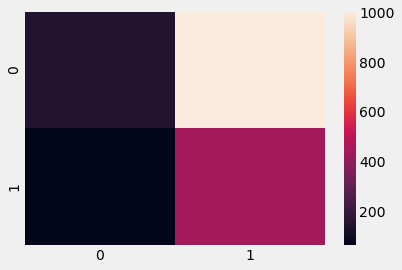

In [23]:
gnb = GaussianNB()
gnb_train = evaluate_bin(gnb, 1)

Accuracy: 0.9897156684815487
Precision: 0.9783889980353635
Recall: 0.9880952380952381
F1: 0.983218163869694
Confusion Matrix: 
 [[1138   11]
 [   6  498]]


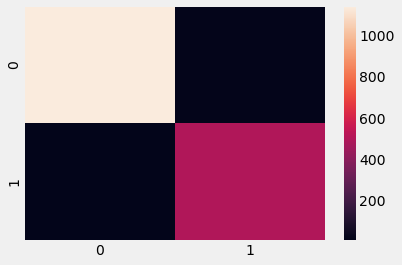

In [24]:
xgb = XGBClassifier()
xgb_train = evaluate_bin(xgb, 1)

Accuracy: 0.9782214156079855
Precision: 0.9534883720930233
Recall: 0.9761904761904762
F1: 0.9647058823529412
Confusion Matrix: 
 [[1125   24]
 [  12  492]]


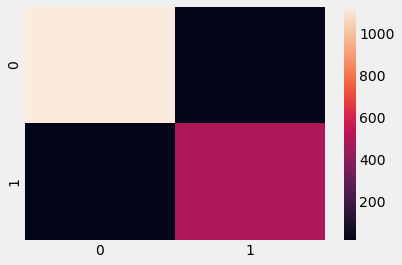

In [25]:
dtc_bin = DecisionTreeClassifier()
dtc_train_bin = evaluate_bin(dtc_bin, 1)